In [18]:
import os
import random
import pandas as pd                        
import numpy as np                        
import fbprophet as Prophet

disease=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/기계/감염병.xlsx', index_col=0)
disease
disease['ds']=pd.to_datetime(disease['시간'], format='%Y-%m-%d')
disease['y']=disease['감염병발생수']
df=disease[['ds','y']]
df

,ds,y
0,2001-01-01,7669
1,2001-02-01,2613
2,2001-03-01,3301
3,2001-04-01,5144
4,2001-05-01,4509
...,...,...
235,2020-08-01,6427
236,2020-09-01,5511
237,2020-10-01,6826
238,2020-11-01,8722


In [19]:
model =  Prophet.Prophet() 
model.fit(df);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
past = model.make_future_dataframe(periods=0, freq='M')
future_data = pd.DataFrame(['2021-01-01','2021-02-01'], columns=['ds']).astype( 'datetime64[ns]')
future_data = pd.concat([past,future_data],axis=0)
forecast_data = model.predict(future_data)

In [29]:
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Alternative holiday of Children's Day,Alternative holiday of Children's Day_lower,Alternative holiday of Children's Day_upper,Alternative holiday of Chuseok,...,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,25171.749508,-3950.701565,1780.038275,25171.749508,25171.749508,0.0,0.0,0.0,0.0,...,-149699.959667,-149699.959667,-149699.959667,123468.498063,123468.498063,123468.498063,0.0,0.0,0.0,-1059.712095
1,2001-02-01,25231.206513,-5054.632178,501.421821,25231.206513,25231.206513,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-27626.206202,-27626.206202,-27626.206202,0.0,0.0,0.0,-2394.999689
2,2001-03-01,25284.909614,-6091.892562,-113.408918,25284.909614,25284.909614,0.0,0.0,0.0,0.0,...,-187535.958890,-187535.958890,-187535.958890,159063.043705,159063.043705,159063.043705,0.0,0.0,0.0,-3188.005571
3,2001-04-01,25344.366619,-4954.726468,1047.585896,25344.366619,25344.366619,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-27253.945253,-27253.945253,-27253.945253,0.0,0.0,0.0,-1909.578634
4,2001-05-01,25401.905657,1585.262741,7375.975145,25401.905657,25401.905657,0.0,0.0,0.0,0.0,...,15033.086609,15033.086609,15033.086609,-35921.005301,-35921.005301,-35921.005301,0.0,0.0,0.0,4513.986965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2020-10-01,31815.271649,4370.572446,10105.810019,31815.271649,31815.271649,0.0,0.0,0.0,0.0,...,1167.507683,1167.507683,1167.507683,-25648.569127,-25648.569127,-25648.569127,0.0,0.0,0.0,7334.210205
238,2020-11-01,30984.189933,5822.341567,11402.195553,30984.189933,30984.189933,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-22463.626467,-22463.626467,-22463.626467,0.0,0.0,0.0,8520.563465
239,2020-12-01,30179.917304,2180.562921,7730.577479,30179.917304,30179.917304,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-25206.448495,-25206.448495,-25206.448495,0.0,0.0,0.0,4973.468809
240,2021-01-01,29348.835588,170.178018,6144.643752,29348.835588,29348.835588,0.0,0.0,0.0,0.0,...,-149699.959667,-149699.959667,-149699.959667,123468.498063,123468.498063,123468.498063,0.0,0.0,0.0,3117.373985


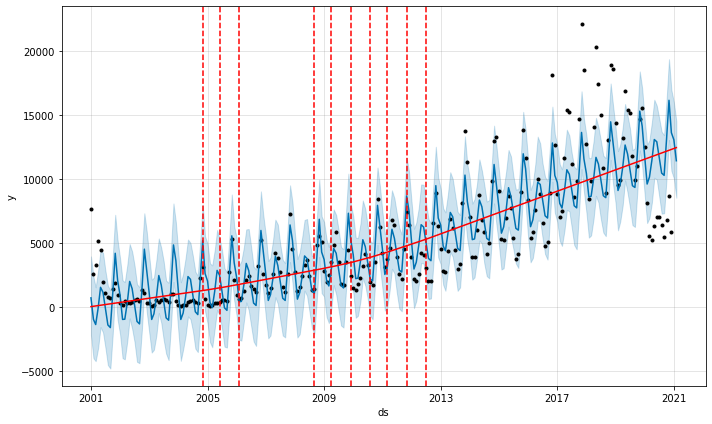

In [21]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast_data)
a = add_changepoints_to_plot(fig.gca(), model, forecast_data)

In [22]:
model =  Prophet.Prophet(changepoint_prior_scale=10, changepoints = ['2020-01-25','2020-02-29'],yearly_seasonality=10,weekly_seasonality=False,daily_seasonality=False, growth='linear') 
model.add_country_holidays(country_name='KR')
model.fit(df);
past = model.make_future_dataframe(periods=0, freq='M')
future_data = pd.DataFrame(['2021-01-01','2021-02-01'], columns=['ds']).astype( 'datetime64[ns]')
future_data = pd.concat([past,future_data],axis=0)
forecast_data = model.predict(future_data)

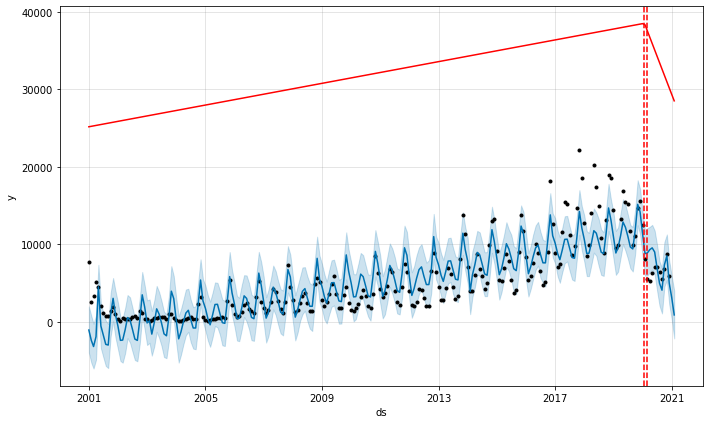

In [23]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast_data)
a = add_changepoints_to_plot(fig.gca(), model, forecast_data)

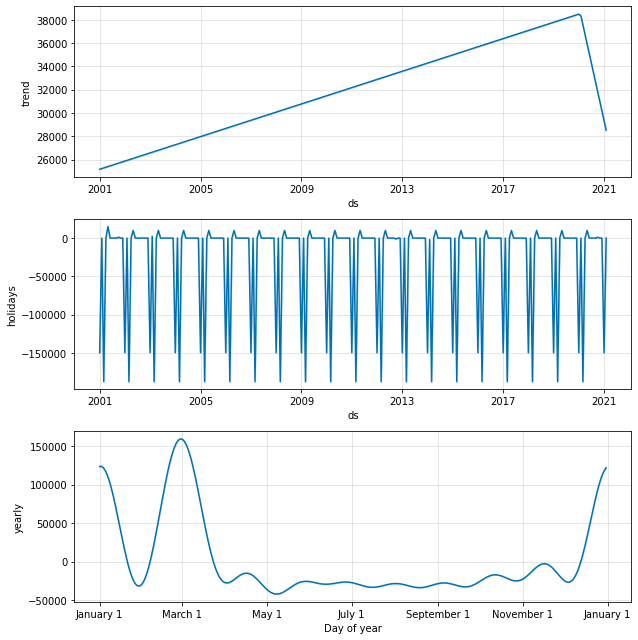

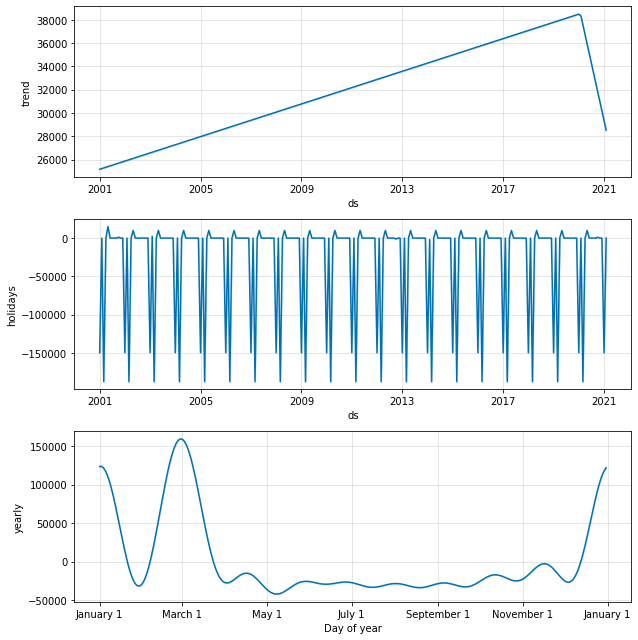

In [24]:
model.plot_components(forecast_data)

In [25]:
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Alternative holiday of Children's Day,Alternative holiday of Children's Day_lower,Alternative holiday of Children's Day_upper,Alternative holiday of Chuseok,...,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,25171.749508,-3970.450262,1995.305715,25171.749508,25171.749508,0.0,0.0,0.0,0.0,...,-149699.959667,-149699.959667,-149699.959667,123468.498063,123468.498063,123468.498063,0.0,0.0,0.0,-1059.712095
1,2001-02-01,25231.206513,-5280.216622,755.002507,25231.206513,25231.206513,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-27626.206202,-27626.206202,-27626.206202,0.0,0.0,0.0,-2394.999689
2,2001-03-01,25284.909614,-6031.138968,-247.534039,25284.909614,25284.909614,0.0,0.0,0.0,0.0,...,-187535.958890,-187535.958890,-187535.958890,159063.043705,159063.043705,159063.043705,0.0,0.0,0.0,-3188.005571
3,2001-04-01,25344.366619,-4885.802684,826.554464,25344.366619,25344.366619,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-27253.945253,-27253.945253,-27253.945253,0.0,0.0,0.0,-1909.578634
4,2001-05-01,25401.905657,1834.015698,7361.828506,25401.905657,25401.905657,0.0,0.0,0.0,0.0,...,15033.086609,15033.086609,15033.086609,-35921.005301,-35921.005301,-35921.005301,0.0,0.0,0.0,4513.986965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2020-10-01,31815.271649,4558.703005,10295.447567,31815.271649,31815.271649,0.0,0.0,0.0,0.0,...,1167.507683,1167.507683,1167.507683,-25648.569127,-25648.569127,-25648.569127,0.0,0.0,0.0,7334.210205
238,2020-11-01,30984.189933,5377.296794,11276.175007,30984.189933,30984.189933,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-22463.626467,-22463.626467,-22463.626467,0.0,0.0,0.0,8520.563465
239,2020-12-01,30179.917304,2229.923086,7862.707977,30179.917304,30179.917304,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-25206.448495,-25206.448495,-25206.448495,0.0,0.0,0.0,4973.468809
240,2021-01-01,29348.835588,325.744934,5900.520388,29348.835588,29348.835588,0.0,0.0,0.0,0.0,...,-149699.959667,-149699.959667,-149699.959667,123468.498063,123468.498063,123468.498063,0.0,0.0,0.0,3117.373985


KeyError: ignored